In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import tensorflow as tf

In [2]:
df = pd.read_csv('../Model Data/binary_outcome_with_stock.csv')
df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1','Date'])
df.dropna(inplace=True)
df.sort_values(by='Search Date').head()

,Binary_Class,Search Date,alcoholism,anxiety,athleisure,cutting hair,depression,dry cough,eczema,fever,...,PFE_Difference,PFE_Volume,AZN_Open,AZN_Close,AZN_Difference,AZN_Volume,NVAX_Open,NVAX_Close,NVAX_Difference,NVAX_Volume
751,Low,2020-01-24,52,78,42,22,75,16,72,38,...,-0.05,20875735.0,48.62,48.51,0.11,1990900.0,7.26,6.81,0.45,4195600.0
750,Low,2020-01-25,39,69,14,33,56,19,84,42,...,0.37,31150865.0,48.76,48.76,0.00,1698800.0,6.63,7.01,-0.38,4168300.0
749,Low,2020-01-26,38,69,41,23,55,16,61,39,...,-0.30,29443490.0,49.46,49.73,-0.27,2303000.0,6.90,6.97,-0.07,2158500.0
748,Low,2020-01-27,48,82,22,24,80,18,60,40,...,0.17,21047748.0,49.69,50.03,-0.34,2531000.0,6.89,6.84,0.05,1457600.0
747,Low,2020-01-28,44,86,41,22,86,17,63,44,...,0.29,21903596.0,49.89,49.40,0.49,1995500.0,6.76,6.31,0.45,2607200.0


In [3]:
df.sort_values(by='Search Date').tail()

,Binary_Class,Search Date,alcoholism,anxiety,athleisure,cutting hair,depression,dry cough,eczema,fever,...,PFE_Difference,PFE_Volume,AZN_Open,AZN_Close,AZN_Difference,AZN_Volume,NVAX_Open,NVAX_Close,NVAX_Difference,NVAX_Volume
16,High,2022-01-28,43,76,40,26,59,18,63,31,...,0.09,32358500.0,56.19,56.68,-0.49,7816900.0,90.36,94.80,-4.44,6481200.0
15,High,2022-01-29,30,73,46,27,46,12,76,29,...,-1.06,67922000.0,56.55,56.65,-0.10,7632300.0,85.02,83.45,1.57,9114900.0
14,High,2022-01-30,39,75,100,35,52,14,81,38,...,0.17,38522200.0,56.99,57.20,-0.21,5571100.0,84.08,91.79,-7.71,5341100.0
13,High,2022-01-31,42,90,45,25,72,14,71,38,...,0.44,34200600.0,58.16,58.60,-0.44,14540200.0,87.18,88.00,-0.82,4925700.0
12,High,2022-02-01,43,88,17,23,70,14,80,32,...,-0.45,34970000.0,58.08,58.04,0.04,9038200.0,90.16,90.44,-0.28,4131200.0


In [4]:
df.shape

(513, 104)

In [5]:
df = df[df.columns.drop(list(df.filter(regex='DJIA')))]

In [6]:
df2 = df.drop(columns=['Search Date'])

binary_cat = df2.dtypes[df2.dtypes == "object"].index.tolist()
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(df2[binary_cat]))
encode_df.columns = enc.get_feature_names(binary_cat)

encode_df.head()

,Binary_Class_High,Binary_Class_Low
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [7]:
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(binary_cat,1)
df.head()

,Search Date,alcoholism,anxiety,athleisure,cutting hair,depression,dry cough,eczema,fever,flu symptoms,...,AZN_Open,AZN_Close,AZN_Difference,AZN_Volume,NVAX_Open,NVAX_Close,NVAX_Difference,NVAX_Volume,Binary_Class_High,Binary_Class_Low
12,2022-02-01,43,88,17,23,70,14,80,32,8,...,58.08,58.04,0.04,9038200.0,90.16,90.44,-0.28,4131200.0,1.0,0.0
13,2022-01-31,42,90,45,25,72,14,71,38,9,...,58.16,58.60,-0.44,14540200.0,87.18,88.00,-0.82,4925700.0,1.0,0.0
14,2022-01-30,39,75,100,35,52,14,81,38,9,...,56.99,57.20,-0.21,5571100.0,84.08,91.79,-7.71,5341100.0,1.0,0.0
15,2022-01-29,30,73,46,27,46,12,76,29,9,...,56.55,56.65,-0.10,7632300.0,85.02,83.45,1.57,9114900.0,1.0,0.0
16,2022-01-28,43,76,40,26,59,18,63,31,8,...,56.19,56.68,-0.49,7816900.0,90.36,94.80,-4.44,6481200.0,1.0,0.0


In [8]:
X = df.drop(columns=['Binary_Class_High','Binary_Class_Low','Search Date'])
y= df['Binary_Class_High']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=50, activation="relu", input_dim=98))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
fit_model = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 4ms/step - loss: 2871464.0000 - accuracy: 0.4269
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 1292450.1250 - accuracy: 0.5154
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 618232.3125 - accuracy: 0.4769
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 526310.0000 - accuracy: 0.4577
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 375863.0000 - accuracy: 0.5654
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 321495.2188 - accuracy: 0.5462
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 233453.8750 - accuracy: 0.5500
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 229710.9844 - accuracy: 0.5577
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 195720.4375 - accuracy: 0.5692
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 191646.2

Epoch 81/100
9/9 [==============================] - 0s 5ms/step - loss: 84988.5312 - accuracy: 0.6500
Epoch 82/100
9/9 [==============================] - 0s 5ms/step - loss: 58905.4414 - accuracy: 0.6538
Epoch 83/100
9/9 [==============================] - 0s 5ms/step - loss: 54959.1914 - accuracy: 0.6923
Epoch 84/100
9/9 [==============================] - 0s 5ms/step - loss: 57685.4336 - accuracy: 0.6923
Epoch 85/100
9/9 [==============================] - 0s 5ms/step - loss: 51759.6875 - accuracy: 0.7423
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 45653.6016 - accuracy: 0.7038
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 44723.0859 - accuracy: 0.7192
Epoch 88/100
9/9 [==============================] - 0s 3ms/step - loss: 112595.6094 - accuracy: 0.6808
Epoch 89/100
9/9 [==============================] - 0s 4ms/step - loss: 72414.7500 - accuracy: 0.7115
Epoch 90/100
9/9 [==============================] - 0s 3ms/step - loss: 45826.546

In [11]:
model_loss, model_accuracy = model.evaluate(X_test,y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 [==============================] - 0s 4ms/step - loss: 59855.3867 - accuracy: 0.6092
Loss: 59855.38671875, Accuracy: 0.6091954112052917


In [12]:
X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = StandardScaler().fit(X_test).transform(X_test)
fit_modelS = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 7ms/step - loss: 0.8769 - accuracy: 0.6385
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6663 - accuracy: 0.7077
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5139 - accuracy: 0.7731
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4313 - accuracy: 0.8077
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3797 - accuracy: 0.8615
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3482 - accuracy: 0.8808
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3260 - accuracy: 0.8923
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3018 - accuracy: 0.8923
Epoch 9/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2842 - accuracy: 0.8923
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.8923
Epoch 11/100
9/9 [===========

9/9 [==============================] - 0s 5ms/step - loss: 0.0474 - accuracy: 0.9923
Epoch 85/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0469 - accuracy: 0.9923
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.9923
Epoch 87/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0454 - accuracy: 0.9962
Epoch 88/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0446 - accuracy: 0.9962
Epoch 89/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0438 - accuracy: 0.9962
Epoch 90/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0432 - accuracy: 0.9962
Epoch 91/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0428 - accuracy: 0.9962
Epoch 92/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0420 - accuracy: 0.9962
Epoch 93/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0412 - accuracy: 0.9962
Epoch 94/100
9/9 [===============

In [13]:
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 [==============================] - 0s 5ms/step - loss: 0.3897 - accuracy: 0.8736
Loss: 0.3896537125110626, Accuracy: 0.8735632300376892


In [14]:
X_train_scaled = MinMaxScaler().fit(X_train).transform(X_train)
X_test_scaled = MinMaxScaler().fit(X_test).transform(X_test)
fit_modelM = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5137 - accuracy: 0.7500
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4869 - accuracy: 0.7769
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4472 - accuracy: 0.8577
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4296 - accuracy: 0.8654
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4118 - accuracy: 0.8654
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3857 - accuracy: 0.9077
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3762 - accuracy: 0.8923
Epoch 8/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3621 - accuracy: 0.8885
Epoch 9/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3535 - accuracy: 0.8923
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3428 - accuracy: 0.8923
Epoch 11/100
9/9 [===========

9/9 [==============================] - 0s 4ms/step - loss: 0.1838 - accuracy: 0.9538
Epoch 85/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1803 - accuracy: 0.9577
Epoch 86/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1817 - accuracy: 0.9538
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1780 - accuracy: 0.9538
Epoch 88/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1785 - accuracy: 0.9500
Epoch 89/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1772 - accuracy: 0.9500
Epoch 90/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1759 - accuracy: 0.9577
Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1754 - accuracy: 0.9538
Epoch 92/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1760 - accuracy: 0.9577
Epoch 93/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1728 - accuracy: 0.9615
Epoch 94/100
9/9 [===============

In [15]:
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 [==============================] - 0s 5ms/step - loss: 0.5365 - accuracy: 0.8046
Loss: 0.536516547203064, Accuracy: 0.8045976758003235


<AxesSubplot:>

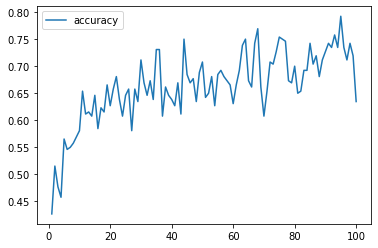

In [16]:
history = pd.DataFrame(fit_model.history)
history.index += 1
history.plot(y="accuracy")

<AxesSubplot:>

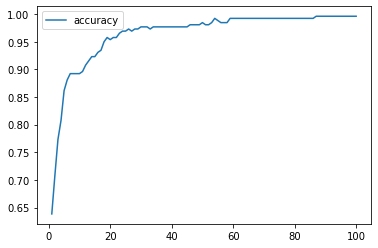

In [17]:
historyS = pd.DataFrame(fit_modelS.history)
historyS.index += 1
historyS.plot(y="accuracy")

<AxesSubplot:>

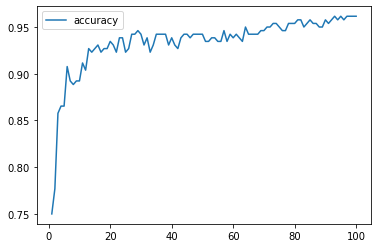

In [18]:
historyM = pd.DataFrame(fit_modelM.history)
historyM.index += 1
historyM.plot(y="accuracy")